In [1]:
import pandas as pd

data = pd.DataFrame({
    'weight': [150, 130, 180, 160, 170, 165, 120, 110, 125, 155],
    'width': [7.2, 6.8, 7.8, 6.5, 6.7, 6.9, 4.5, 4.3, 4.7, 7.1],
    'height': [8.3, 8.0, 8.5, 7.5, 7.8, 8.1, 12.0, 11.5, 12.2, 8.2],
    'color_score': [0.85, 0.90, 0.70, 0.68, 0.75, 0.73, 0.55, 0.52, 0.50, 0.88],
    'fruit': [0, 0, 0, 1, 1, 1, 2, 2, 2, 0]  # 0=Apple, 1=Orange, 2=Banana
})

In [2]:
# Print feature and class names
print("Features:", list(data.columns[:-1]))
print("Classes: 0=Apple, 1=Orange, 2=Banana")
print(data.head())

Features: ['weight', 'width', 'height', 'color_score']
Classes: 0=Apple, 1=Orange, 2=Banana
   weight  width  height  color_score  fruit
0     150    7.2     8.3         0.85      0
1     130    6.8     8.0         0.90      0
2     180    7.8     8.5         0.70      0
3     160    6.5     7.5         0.68      1
4     170    6.7     7.8         0.75      1


In [3]:
from sklearn.model_selection import train_test_split

X = data[['weight', 'width', 'height', 'color_score']]
y = data['fruit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [4]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [5]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


In [6]:
print("Prediction for fruit with [140g, 6.9cm, 8.0cm, 0.87 color score]:", clf.predict([[140, 6.9, 8.0, 0.87]]))
# Output will be 0, 1, or 2 (Apple, Orange, Banana)

Prediction for fruit with [140g, 6.9cm, 8.0cm, 0.87 color score]: [0]


C:\Users\Abhijit Kavuru\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [7]:
feature_imp = pd.Series(clf.feature_importances_, index=['weight', 'width', 'height', 'color_score']).sort_values(ascending=False)
print("Feature Importance:\n", feature_imp)

Feature Importance:
 width          0.327925
height         0.253140
color_score    0.227249
weight         0.191686
dtype: float64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


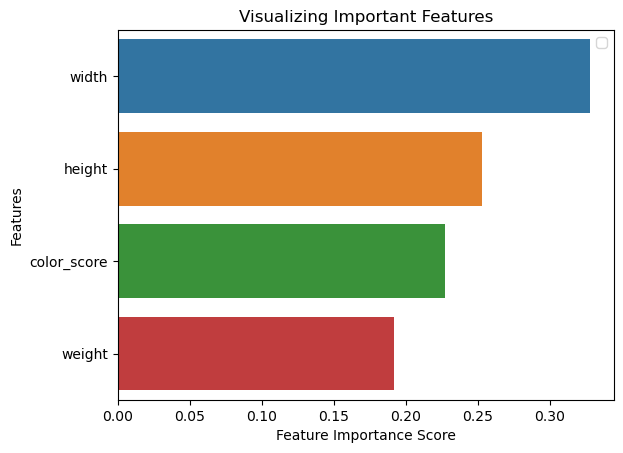

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()
